In [1749]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [1750]:
df = pd.read_csv("data.csv")

In [1751]:
df.index = pd.to_datetime(df["busi_date"], format = "%Y/%m/%d")

In [1752]:
df["industry"] = df["industry"].astype(str)

In [1753]:
df["industry"] = df["industry"].str.lstrip("ind")
df["industry"] = df["industry"].str.zfill(2)
df["industry"] = "ind"+ df["industry"]

In [1754]:
df1 = pd.read_csv("data20230523.csv")

In [1755]:
div = df1.pivot_table(index = "busi_date", values = "prev_ttl_asset")

In [1756]:
div.index = pd.to_datetime(div.index, format = "%Y/%m/%d")

In [1757]:
div = div.sort_index()

In [1776]:
div

,prev_ttl_asset
busi_date,
2023-05-04,15181122.82
2023-05-05,15199803.72
2023-05-08,15126329.83
2023-05-09,15358291.93
2023-05-10,15235423.16
2023-05-11,15143019.20
2023-05-12,15095675.60
2023-05-15,14911953.10
2023-05-16,15115545.46


In [1758]:
df2 = df.groupby(["industry","order_book_id", "hs300",df.index])[["mktval","daily_profit"]].sum()
df2 = df2.join(div)

In [1759]:
weights = index_weights('000300.XSHG', '20230520')
weights = weights.sort_index()
weights_300 = pd.DataFrame(weights)

In [1760]:
weights_300["weight"] = weights_300[0]
weights_300 = weights_300.drop(0,axis = 1)

In [1761]:
df2

mktval  daily_profit  \
industry order_book_id hs300     busi_date                           
ind01    000538.XSHE   000300.SH 2023-05-04  23664.0        389.52   
                                 2023-05-05  23460.0       -394.48   
                                 2023-05-08  23660.0        213.05   
                                 2023-05-09      0.0       -286.91   
                                 2023-05-10   5740.0        -19.86   
...                                              ...           ...   
ind31    300957.XSHE   000300.SH 2023-05-15  10764.0        157.31   
                                 2023-05-16  10700.0        -19.95   
                                 2023-05-17  10553.0        -36.82   
                                 2023-05-18  10204.0       -408.72   
                                 2023-05-19  10095.0        -97.19   

                                             prev_ttl_asset  
industry order_book_id hs300     busi_date                   
ind01    000538.XSHE   000300.SH 2023-05-04     15181122.82  
                                 2023-05-05     15199803.72  
                                 2023-05-08     15126329.83  
                                 2023-05-09     15358291.93  
                                 2023-05-10     15235423.16  
...                                                     ...  
ind31    300957.XSHE   000300.SH 2023-05-15     14911953.10  
                                 2023-05-16     15115545.46  
                                 2023-05-17     15005046.91  
                                 2023-05-18     14960483.64  
                                 2023-05-19     14951734.08  

[3445 rows x 3 columns]

In [1762]:
df6 = pd.merge(df2,weights_300,on = "order_book_id")

In [1763]:
df6 = df6.drop(["mktval", "daily_profit","prev_ttl_asset"], axis=1)

In [1764]:
df2["yield"] = df2["daily_profit"]/df2["prev_ttl_asset"]

In [1765]:
df2 = df2.reset_index()

In [1766]:
df6

,weight
order_book_id,
000538.XSHE,0.00215
000538.XSHE,0.00215
000538.XSHE,0.00215
000538.XSHE,0.00215
000538.XSHE,0.00215
...,...
300957.XSHE,0.00075
300957.XSHE,0.00075
300957.XSHE,0.00075


In [1634]:
df2 = pd.merge(df2,df6,on=df6.index)

In [1635]:
df2 = df2.drop("key_0",axis=1)

In [1636]:
df2 = df2.pivot_table(index = ["industry","order_book_id","busi_date"], values = ["yield","weight"])

In [1637]:
df4 = pd.DataFrame(index = df3.index)

In [1638]:
df4["Results"] = df3["yield"]/df3["weight"]

In [1639]:
df4 = df4.reset_index()

In [1640]:
# df4 = df4.replace([np.inf, -np.inf,np.nan], 0)

In [1641]:
df4

,industry,order_book_id,busi_date,Results
0,ind01,000538.XSHE,2023-05-04,0.011934
1,ind01,000538.XSHE,2023-05-05,-0.012071
2,ind01,000538.XSHE,2023-05-08,0.006551
3,ind01,000538.XSHE,2023-05-09,-0.008689
4,ind01,000538.XSHE,2023-05-10,-0.000606
...,...,...,...,...
3440,ind31,300957.XSHE,2023-05-15,0.014066
3441,ind31,300957.XSHE,2023-05-16,-0.001760
3442,ind31,300957.XSHE,2023-05-17,-0.003272
3443,ind31,300957.XSHE,2023-05-18,-0.036427


In [1642]:
df4 = df4.groupby(["industry","order_book_id","busi_date"])[["Results"]].sum()

In [1643]:
df4

Results
industry order_book_id busi_date           
ind01    000538.XSHE   2023-05-04  0.011934
                       2023-05-05 -0.012071
                       2023-05-08  0.006551
                       2023-05-09 -0.008689
                       2023-05-10 -0.000606
...                                     ...
ind31    300957.XSHE   2023-05-15  0.014066
                       2023-05-16 -0.001760
                       2023-05-17 -0.003272
                       2023-05-18 -0.036427
                       2023-05-19 -0.008667

[3445 rows x 1 columns]

In [1644]:
df5 = df4

In [1645]:
df5.pivot_table(index = "busi_date", columns = "order_book_id", values = "Results")

order_book_id,000001.XSHE,000002.XSHE,000063.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000301.XSHE,000333.XSHE,000338.XSHE,...,688008.XSHG,688012.XSHG,688036.XSHG,688126.XSHG,688187.XSHG,688303.XSHG,688396.XSHG,688561.XSHG,688599.XSHG,688981.XSHG
busi_date,,,,,,,,,,,,,,,,,,,,,
2023-05-04,-0.013730,-0.014078,-0.048517,-0.020589,-0.000805,-0.005034,0.021393,-0.015131,0.002022,0.009852,...,-0.009615,-0.029059,0.070126,0.000750,0.014402,-0.019844,-0.005246,-0.038070,-0.001625,-0.027834
2023-05-05,0.022370,0.016655,-0.002460,-0.001160,0.004863,-0.005728,0.024759,-0.008990,0.002611,0.009373,...,-0.002164,0.003080,-0.043291,-0.041099,0.011598,-0.025551,-0.003136,-0.013243,-0.003324,0.007910
2023-05-08,0.020068,-0.000608,0.020517,-0.000791,-0.007730,-0.003210,0.018761,0.009728,-0.001731,0.018694,...,0.001371,0.019744,0.070814,-0.018718,-0.008014,0.005744,-0.002597,0.014419,-0.022490,0.002003
2023-05-09,-0.012288,-0.004062,-0.023733,0.023811,0.000838,0.001240,-0.003385,-0.006670,-0.004151,-0.024349,...,-0.007338,-0.037262,0.023212,-0.017461,-0.022219,-0.011431,0.009636,-0.028801,-0.002276,-0.079462
2023-05-10,-0.012966,-0.004397,-0.027966,-0.018935,0.007093,-0.006867,-0.020212,0.010076,-0.009101,-0.004922,...,-0.007890,-0.017636,-0.013105,-0.034503,-0.017432,0.012075,0.008767,-0.000387,-0.004268,-0.001016
2023-05-11,-0.003905,0.003081,-0.005016,0.005414,0.003981,-0.003391,-0.002198,-0.002873,0.003850,-0.000256,...,-0.006606,0.002402,-0.004992,-0.014338,-0.008782,-0.000437,0.007894,-0.008987,-0.006543,0.001124
2023-05-12,-0.011266,-0.009416,-0.016782,-0.002057,-0.003739,-0.012770,-0.009812,-0.033174,-0.003099,-0.017838,...,-0.022035,0.009360,0.003942,-0.056255,-0.037230,0.003072,-0.023454,-0.018251,-0.019265,0.003012
2023-05-15,0.012483,0.000023,0.002921,-0.004597,0.002049,0.007922,0.004203,0.004088,0.020531,0.032467,...,0.002372,-0.033132,-0.009346,-0.001492,0.021834,0.015470,-0.001009,0.008433,0.029275,0.014596
2023-05-16,-0.017222,-0.011024,-0.000198,-0.009532,0.005566,-0.008725,-0.008006,-0.010025,-0.018549,-0.007736,...,-0.003555,0.005425,-0.021823,-0.001015,-0.003447,0.001186,-0.001933,-0.007707,0.030877,-0.004681


In [1646]:
df4 = df4.fillna(0)

In [1647]:
df4

Results
industry order_book_id busi_date           
ind01    000538.XSHE   2023-05-04  0.011934
                       2023-05-05 -0.012071
                       2023-05-08  0.006551
                       2023-05-09 -0.008689
                       2023-05-10 -0.000606
...                                     ...
ind31    300957.XSHE   2023-05-15  0.014066
                       2023-05-16 -0.001760
                       2023-05-17 -0.003272
                       2023-05-18 -0.036427
                       2023-05-19 -0.008667

[3445 rows x 1 columns]

In [1648]:
df4 = df4.groupby(["industry","busi_date"])[["Results"]].sum()

In [1649]:
df4 = df4.groupby("industry")[["Results"]].sum()

In [1650]:
df4 = df4.sort_values(by="Results", ascending = False)

In [1651]:
df5 = df5.reset_index()

In [1652]:
df5 = df5.pivot_table(index = "busi_date", columns = "industry", values = "Results")

In [1653]:
df5 = df5.fillna(value=0.0)

In [1654]:
df4

,Results
industry,
ind17,1.083463
ind24,0.198489
ind27,0.066082
ind22,0.025468
ind04,-0.014544
ind06,-0.019718
ind28,-0.025798
ind10,-0.028962
ind02,-0.049974


In [1655]:
df5

industry,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind09,ind10,ind11,...,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind31
busi_date,,,,,,,,,,,,,,,,,,,,,
2023-05-04,0.001909,-0.001163,0.000287,0.018947,-0.002812,-0.011536,0.007440,-0.019325,0.002103,-0.004259,...,-0.004686,0.007784,-0.031290,0.000756,-0.006697,-0.013718,-0.011208,0.013743,-0.016985,-0.020001
2023-05-05,-0.010709,-0.009859,-0.003818,-0.004559,-0.003314,-0.006706,-0.012254,-0.003799,-0.005760,0.002119,...,-0.009639,-0.015232,-0.005020,-0.008364,-0.006083,-0.011442,0.000109,0.008497,-0.007484,-0.005841
2023-05-08,0.003954,0.010577,0.001426,0.006540,-0.000678,-0.004448,0.005358,0.018052,0.027422,-0.002960,...,0.011580,0.009596,-0.002701,0.036266,0.007652,0.010095,0.023942,0.023068,0.033221,0.003301
2023-05-09,-0.010698,-0.007652,-0.005522,-0.005900,-0.002869,-0.004945,-0.015952,-0.019503,0.005734,-0.002584,...,-0.022088,-0.022716,-0.007165,-0.016141,-0.009730,-0.000873,-0.002493,0.001020,-0.019776,-0.027025
2023-05-10,-0.000746,0.032155,-0.007044,-0.007983,0.004829,0.003584,-0.016377,-0.013902,-0.010436,-0.005809,...,0.009377,0.001425,-0.010249,-0.005113,0.003894,-0.001304,-0.007336,-0.024797,-0.014333,-0.005587
2023-05-11,0.000587,-0.008360,-0.001283,0.009235,0.000903,-0.000806,-0.006557,-0.013482,-0.014479,-0.006636,...,0.009119,0.019300,-0.003809,-0.000459,-0.007092,-0.010064,-0.000179,-0.003427,-0.005163,0.023351
2023-05-12,-0.007006,-0.014697,-0.002827,0.007515,-0.005848,-0.004190,-0.021863,-0.020671,-0.011709,-0.006911,...,-0.011099,0.022289,-0.018278,-0.010836,-0.015109,-0.005707,-0.007324,-0.012015,-0.016730,-0.039775
2023-05-15,0.013186,0.011207,0.003891,-0.008867,0.013845,0.003464,-0.001914,0.008595,0.003000,0.008341,...,0.023342,-0.029321,0.012355,0.025156,0.024421,0.006288,0.016879,0.018243,0.001462,0.014066
2023-05-16,0.000377,-0.004599,-0.003468,-0.000819,-0.004077,-0.007249,-0.011802,-0.009339,-0.005767,-0.009332,...,0.000570,-0.003059,-0.014598,-0.011440,-0.005198,-0.017929,-0.001993,-0.008721,0.001537,-0.001760


In [1662]:
import matplotlib.ticker as mtick

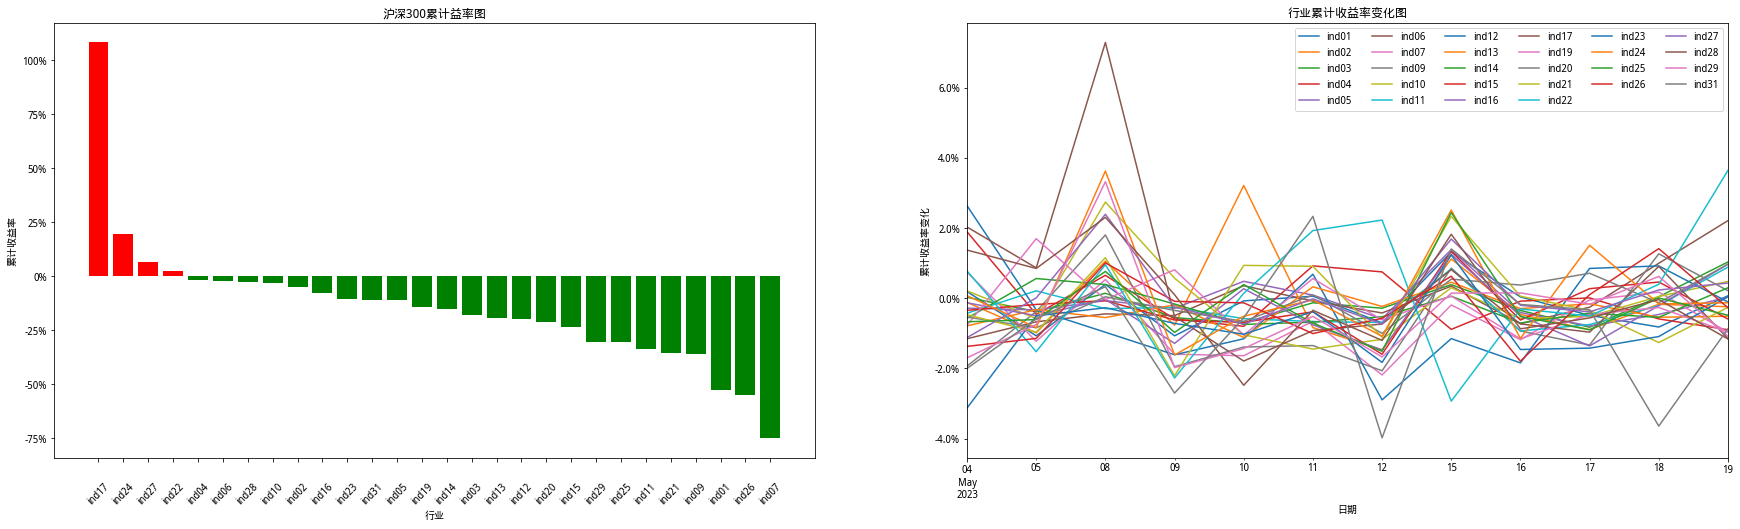

In [1664]:
plt.figure(figsize=(30,8))
colors = ["green" if value < 0 else "red" for value in df4["Results"]]
ax=plt.subplot(121)
ax.bar(df4.index, df4["Results"], color = colors)
# industry.plot(kind='bar', ax=ax)
ax.set(title="沪深300累计益率图", xlabel='行业', ylabel='累计收益率')
ax.set_xticklabels(df4.index, rotation = 45)
ax.xaxis.set_tick_params(pad = 20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

ax=plt.subplot(122)
df5.plot(ax=ax)
ax.legend(loc = "upper right", ncol = 6)
ax.set(title="行业累计收益率变化图", xlabel='日期', ylabel='累计收益率变化')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [1782]:
df_300 = get_price(order_book_ids=weights.index, start_date="20230428", end_date="20230520", frequency="1d")

In [1783]:
df_300 = df_300.groupby(["order_book_id", "date"])[["close"]].sum()

In [1784]:
df_300 = df_300.sort_values(by = "order_book_id")

In [1785]:
df_300

close
order_book_id date             
000001.XSHE   2023-04-28  12.55
              2023-05-04  12.73
              2023-05-05  12.91
              2023-05-08  13.32
              2023-05-09  13.16
...                         ...
688981.XSHG   2023-05-15  54.87
              2023-05-16  54.25
              2023-05-18  55.10
              2023-05-09  52.78
              2023-05-19  55.00

[3900 rows x 1 columns]

In [1786]:
div

,prev_ttl_asset
busi_date,
2023-05-04,15181122.82
2023-05-05,15199803.72
2023-05-08,15126329.83
2023-05-09,15358291.93
2023-05-10,15235423.16
2023-05-11,15143019.20
2023-05-12,15095675.60
2023-05-15,14911953.10
2023-05-16,15115545.46


In [1787]:
df_300 = df_300.reset_index()

In [1788]:
df_300 = pd.merge(df_300,df6,on = "order_book_id")

In [1726]:
weights = index_weights('000300.XSHG', '20230520')
weights = weights.sort_index()
weights_300 = pd.DataFrame(weights)
weights_300["weight"] = weights_300[0]
weights_300 = weights_300.drop(0,axis = 1)

df_300["div"] = div["prev_ttl_asset"]

# df6 = pd.merge(df_300,weights_300,on = "order_book_id")
# # df6 = df6.drop(["mktval", "daily_profit","prev_ttl_asset"], axis=1)
# df_300["yield"] = df_300["close"]/df2["prev_ttl_asset"]
div

,prev_ttl_asset
busi_date,
2023-05-04,15181122.82
2023-05-05,15199803.72
2023-05-08,15126329.83
2023-05-09,15358291.93
2023-05-10,15235423.16
2023-05-11,15143019.20
2023-05-12,15095675.60
2023-05-15,14911953.10
2023-05-16,15115545.46


In [1789]:
df_300.rename(columns = {'date':'busi_date'}, inplace = True)

In [1791]:
df_300 = pd.merge(df_300,div,on="busi_date")

In [1792]:
df_300.index = df_300[""]

,order_book_id,busi_date,close,weight,prev_ttl_asset
0,000001.XSHE,2023-05-04,12.73,0.00626,15181122.82
1,000001.XSHE,2023-05-04,12.73,0.00626,15181122.82
2,000001.XSHE,2023-05-04,12.73,0.00626,15181122.82
3,000001.XSHE,2023-05-04,12.73,0.00626,15181122.82
4,000001.XSHE,2023-05-04,12.73,0.00626,15181122.82
...,...,...,...,...,...
41335,688981.XSHG,2023-05-18,55.10,0.00620,14960483.64
41336,688981.XSHG,2023-05-18,55.10,0.00620,14960483.64
41337,688981.XSHG,2023-05-18,55.10,0.00620,14960483.64
41338,688981.XSHG,2023-05-18,55.10,0.00620,14960483.64
